In [32]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression

from jcopml.plot import plot_missing_value, plot_residual, plot_actual_vs_prediction, plot_classification_report, plot_pr_curve, plot_roc_curve, \
      plot_association_matrix, plot_correlation_matrix, plot_confusion_matrix
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.feature_importance import mean_score_decrease
from jcopml.pipeline import num_pipe, cat_pipe 

In [2]:
from luwiji.logistic_regression import illustration

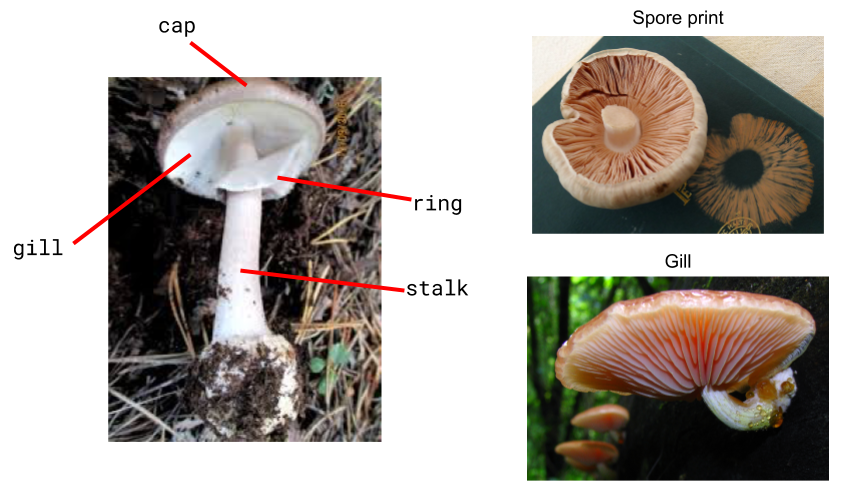

In [13]:
illustration.mushroom

### Import Data

In [11]:
data = pd.read_csv('E:\Data Science\Python\machine learning exercises\dataset\mushrooms.csv')
data

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,knobbed,smooth,brown,False,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,NaN,NaN,partial,orange,1,pendant,buff,clustered,leaves
8120,True,convex,smooth,brown,False,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,NaN,NaN,partial,brown,1,pendant,buff,several,leaves
8121,True,flat,smooth,brown,False,none,attached,close,broad,brown,enlarging,NaN,smooth,smooth,NaN,NaN,partial,orange,1,pendant,buff,clustered,leaves
8122,False,knobbed,scaly,brown,False,fishy,free,close,narrow,buff,tapering,NaN,smooth,silky,white,white,partial,white,1,evanescent,white,several,leaves


,missing_value,%
edible,0,0.00
cap_shape,0,0.00
cap_surface,0,0.00
cap_color,0,0.00
bruises,0,0.00
odor,0,0.00
gill_attachment,0,0.00
gill_spacing,0,0.00
gill_size,0,0.00
gill_color,0,0.00


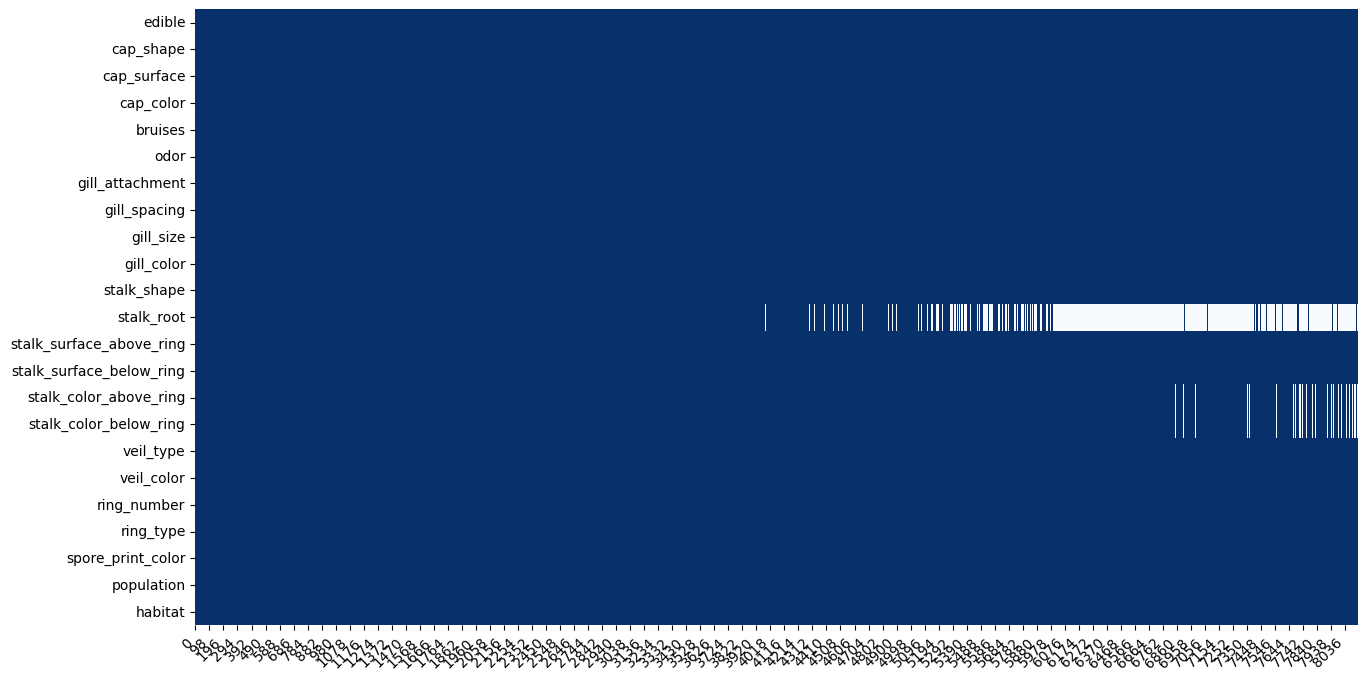

In [15]:
plot_missing_value(data, return_df=True)

In [16]:
data.drop('stalk_root', axis=1, inplace=True)

In [17]:
data.edible.value_counts(normalize=True)

True     0.517971
False    0.482029
Name: edible, dtype: float64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   bool  
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_surface_above_ring  8124 non-null   object
 12  stalk_surface_below_ring  8124 non-null   object
 13  stalk_color_above_ring    7932 non-null   object
 14  stalk_color_below_ring  

In [26]:
data.veil_type.value_counts()

partial    8124
Name: veil_type, dtype: int64

In [27]:
data.drop('veil_type', axis=1, inplace=True)

### Plot Assosiation Matrix

In [29]:
plot_association_matrix(data, target_col='edible')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

- Kita bis lihat dari Proficiency bahwa odor sangat menentukan apakah jamur edible atau tidak U(X|Y) = 0.9, tapi bukan berarti sebaliknya U(Y|X) = 0.4 

### Dataset Splitting

In [30]:
X = data[['odor', 'gill_color', 'ring_type', 'spore_print_color']]
y = data['edible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 4), (1625, 4), (6499,), (1625,))

### Trainning

In [31]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), list(X_train.columns))
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42)) 
])

model = GridSearchCV(estimator=pipeline, cv=3, n_jobs=-1, verbose=1,param_grid=gsp.logreg_params)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.best_score_, model.score(X_train,  y_train), model.score(X_test, y_test))


Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 100.0, 'algo__fit_intercept': True}
0.9944606149803219 0.9944606862594245 0.9950769230769231


### Evaluation Matrix

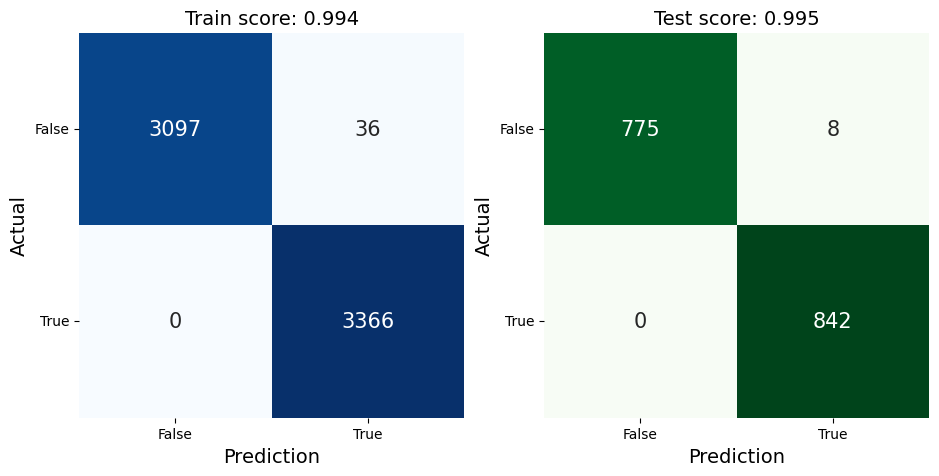

In [33]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [34]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       783
        True       0.99      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



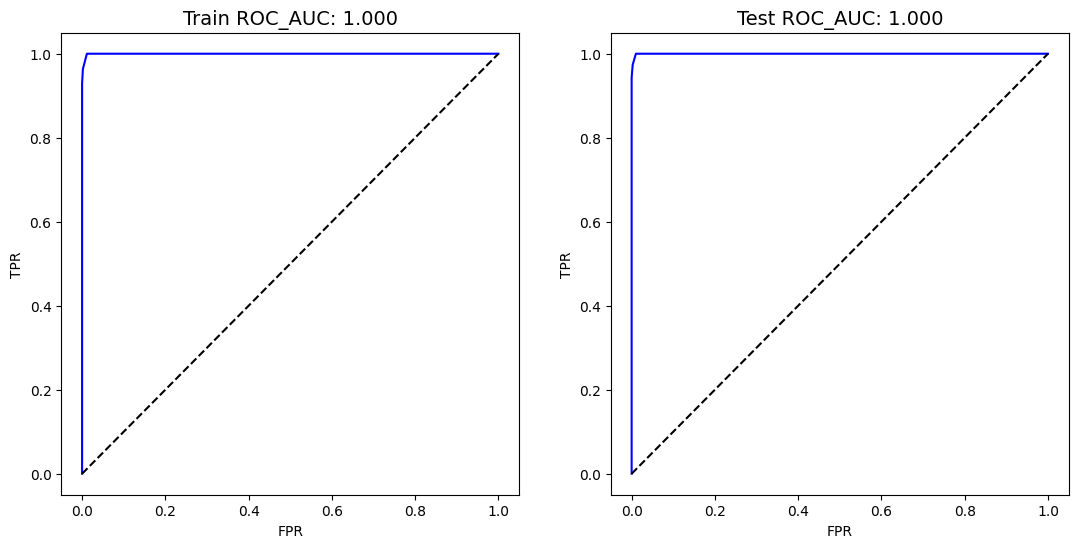

In [36]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

### Feature Importance

,feature,importance,stdev
0,odor,0.438406,0.005246
3,spore_print_color,0.018280,0.000811
1,gill_color,0.001200,0.000329
2,ring_type,0.000000,0.000000


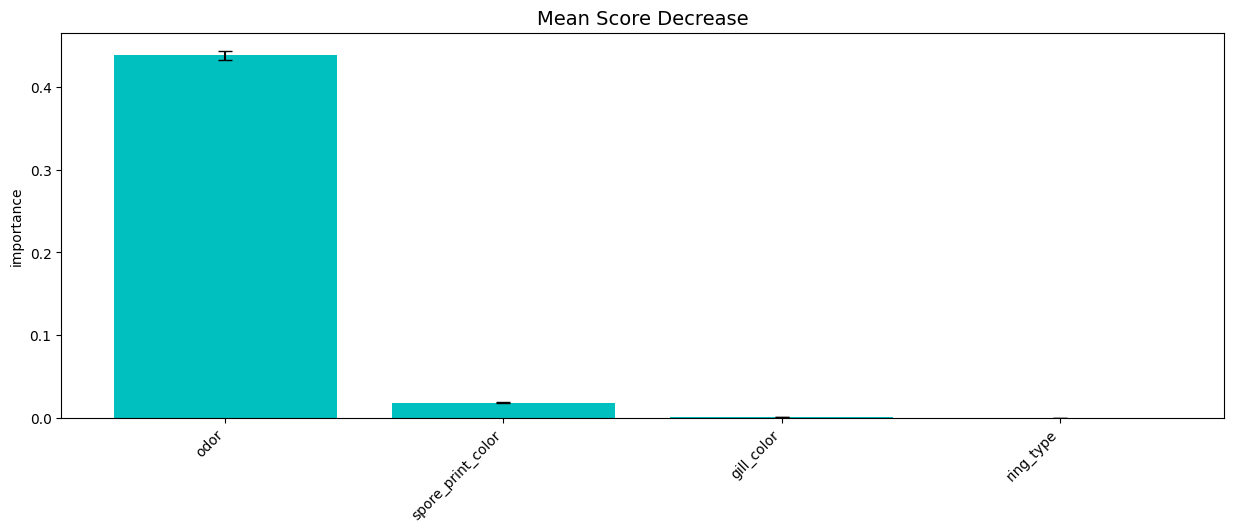

In [39]:
mean_score_decrease(X_train, y_train, model, plot=True)

### Insight from Data

<AxesSubplot: xlabel='ring_type', ylabel='count'>

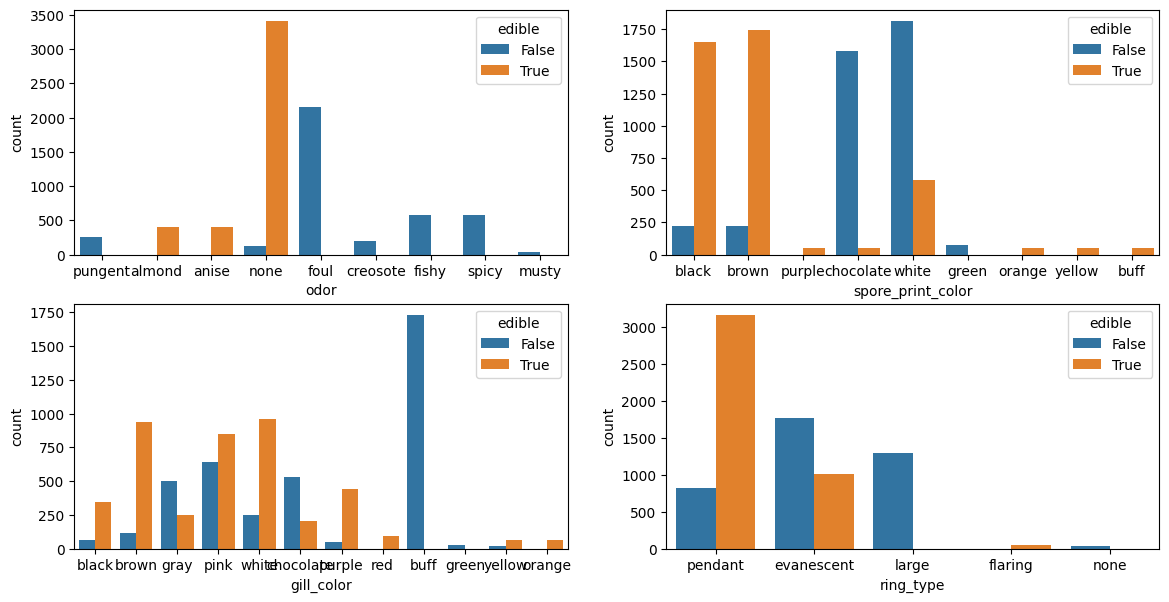

In [46]:
plt.figure(figsize=(14, 7))
plt.subplot(221)
sns.countplot(data, x='odor', hue='edible')
plt.subplot(222)
sns.countplot(data, x='spore_print_color', hue='edible')
plt.subplot(223)
sns.countplot(data, x='gill_color', hue='edible')
plt.subplot(224)
sns.countplot(data, x='ring_type', hue='edible')

### Plot Correlation Ratio

c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\jcopml\plot\_correlation_ratio.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_mean = df_corr.groupby(cat).mean()[numvar]
c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\jcopml\plot\_correlation_ratio.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_mean = df_corr.groupby(cat).mean()[numvar]
c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\jcopml\plot\_correlation_ratio.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In

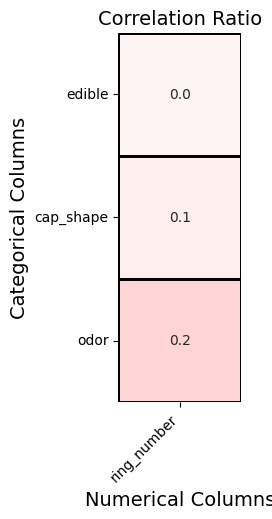

In [41]:
from jcopml.plot import plot_correlation_ratio

plot_correlation_ratio(data, ['edible', 'cap_shape', 'odor'], ['ring_number'])